# Evaluate the performance and relevance of the deep AutoEncoder in detecting some essential structures for predicting similar sequences

Similarly as in the notebook *3_AE_relevance_metaclonotypes*, this notebook explores if the deep AutoEncoder is able to accurately detect some essential structures and patterns in the TCR sequences. This allows us to evaluate and determine if our deep model can cluster well and better TCR sequences with similar structures based on TCRdist.

In [1]:
# Import all the necessary modules and functions from automate.py
from automate import *

2023-06-10 12:36:40.198975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
# Load pre-processed data
with (open("df_comparison.pkl", "rb")) as openfile:
    df = pickle.load(openfile)

with (open("data.pkl", "rb")) as openfile:
    data = pickle.load(openfile)

data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))
data['CDR3_al_one_hot'] = df['CDR3_al_integer']
data = [np.stack(col.values) for _, col in data.items()]
X_train = data

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1,CDR3_al_one_hot,CDR3_al_integer,label
0,CASSAQGTGDRGYTF,CASSA-----QGTGDRGYTF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 27, 13]",CASSAQGTGDRGYTF+TCRBV27-01+TCRBJ01-02,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ01-02,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 1, 0, 0, 0, 0, 0, 14, 6, 17, 6,...",0
1,CASSLVATGNTGELFF,CASSL----VATGNTGELFF,"[12, 16, 34, 34, 31, 31, 31, 31, 23, 27, 27, 13]",CASSLVATGNTGELFF+TCRBV07-09+TCRBJ02-02,CGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCT...,eOX56,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV07-09,TCRBJ02-02,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 18, 1, 17, 6, 1...",0
2,CALKVGADTQYF,CALKV--------GADTQYF,"[12, 16, 31, 31, 31, 31, 31, 31, 31, 31, 27, 13]",CALKVGADTQYF+TCRBV30-01+TCRBJ02-03,CTGAGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCT...,eQD124,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV30-01,TCRBJ02-03,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 10, 9, 18, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1...",0
3,CASSLWASGRGGTGELFF,CASSLW--ASGRGGTGELFF,"[12, 16, 34, 34, 31, 31, 34, 27, 27, 13]",CASSLWASGRGGTGELFF+TCRBV27-01+TCRBJ02-02,AGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTTTATGGG...,eAV93,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-02,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 19, 0, 0, 1, 16, 6, 15, 6, ...",0
4,CASSLLGWEQLDEQFF,CASSL----LGWEQLDEQFF,"[12, 16, 34, 34, 31, 31, 31, 31, 27, 27, 13]",CASSLLGWEQLDEQFF+TCRBV27-01+TCRBJ02-01,TCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGTT...,eMR16,"ORF1ab,surface glycoprotein","ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK",533,24073,TCRBV27-01,TCRBJ02-01,ADAGFIKQY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 10, 6, 19, 4, 1...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236340,CASSSGPQETQYF,CASSS-------GPQETQYF,"[12, 16, 34, 34, 34, 31, 31, 31, 31, 31, 31, 3...",CASSSGPQETQYF+TCRBV07-09+TCRBJ02-05,GAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTG...,eAV88,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 16, 0, 0, 0, 0, 0, 0, 0, 6, 13,...",28
236341,CASSKRDSQETQYF,CASSK------RDSQETQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSKRDSQETQYF+TCRBV07-09+TCRBJ02-05,ATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCA...,eDH105,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV07-09,TCRBJ02-05,AQVDVVNFNL,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 9, 0, 0, 0, 0, 0, 0, 15, 3, 16,...",28
236342,CASSQLPGQGKVQYF,CASSQ-----LPGQGKVQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 45, 27, 13]",CASSQLPGQGKVQYF+TCRBV04-01+TCRBJ02-07,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,eAV93,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV04-01,TCRBJ02-07,AQVDVVNFNL,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 14, 0, 0, 0, 0, 0, 10, 13, 6, 1...",28
236343,CASSPGDNEQFF,CASSP--------GDNEQFF,"[12, 16, 34, 34, 45, 31, 31, 31, 31, 31, 31, 3...",CASSPGDNEQFF+TCRBV09-01+TCRBJ02-01,CTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCT...,eEE224,ORF10,"AQVDVVNFNL,NYIAQVDVV",29630,29668,TCRBV09-01,TCRBJ02-01,AQVDVVNFNL,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 6, ...",28


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization_12 (BatchN  (None, 40)          160         ['dense_19[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                         

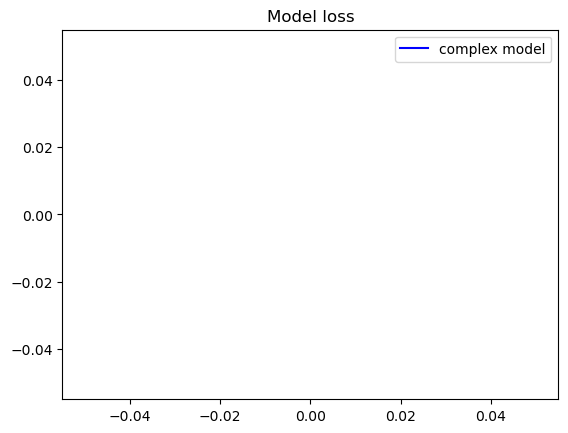

In [28]:
# Setting the parameters for model building and training of the deep AE
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.2,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 10,
            "patience": 20,
            "n_inputs" : 20,
            "v_inputs" : 54,
            "j_inputs" : 13
        }
model, encoder, decoder = train_model_complex(df, X_train, params=params)

In [29]:
# Reload data
with (open("df_comparison.pkl", "rb")) as openfile:
    df = pickle.load(openfile)

In [30]:
# Inspect metaclonotypes 
metaclonotypes_filenames =[
    "mira_epitope_55_524_ALRKVPTDNYITTY_KVPTDNYITTY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv",
    "mira_epitope_70_345_DTDFVNEFYAY_NRDVDTDFVNEFY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv",
    "mira_epitope_90_216_GYQPYRVVVL_PYRVVVLSF_QPYRVVVL_QPYRVVVLSF.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv",
    "mira_epitope_53_532_NYLYRLFRK_NYNYLYRLF.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv"
]
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_55_524_ALRKVPTDNYITTY_KVPTDNYITTY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')
index = list(f['cdr3_b_aa'].values).index(f['cdr3_b_aa'][0])

print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample = df[df["CDR3"].isin(group)]
print(len(sample))
print(sample["label"].unique())

58
1183
[ 20 217  75 246]


In [31]:
# Count values label
sample["label"].value_counts()

20     1142
217      33
75        5
246       3
Name: label, dtype: int64

In [32]:
# Label metaclonotype group
sample = sample[sample["label"] == 20]
sample["file"] = 0

In [33]:
# Repeat these steps for a different metaclonotype group
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_67_382_APHGVVFL_APHGVVFLHV_GVVFLHVTY_VVFLHVTYV.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')
index = list(f['cdr3_b_aa'].values).index(f['cdr3_b_aa'][0])
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample2 = df[df["CDR3"].isin(group)]
print(len(sample2))
print(sample2["label"].unique())
sample2 = sample2[sample2["label"] == 25]
sample2["file"] = 1

30
1856
[219  25  71]


In [34]:
# Repeat these steps for a different metaclonotype group
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_70_345_DTDFVNEFYAY_NRDVDTDFVNEFY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')
index = list(f['cdr3_b_aa'].values).index(f['cdr3_b_aa'][0])
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample3 = df[df["CDR3"].isin(group)]
print(len(sample3))
print(sample3["label"].unique())
sample3 = sample3[sample3["label"] == 50]
sample3["file"] = 2

25
687
[111  70  50 121   7   8  64 250]


/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

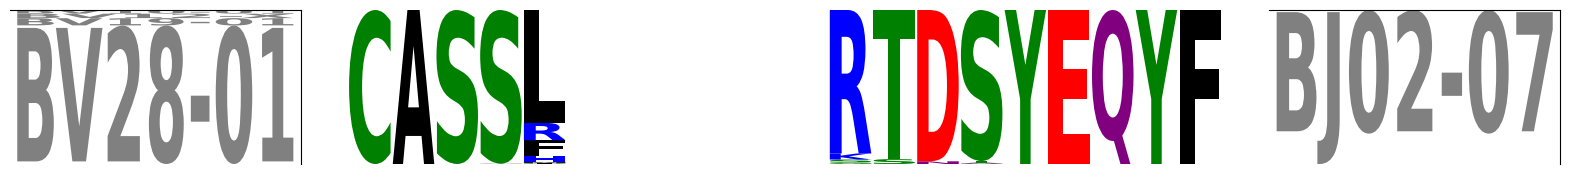

In [35]:
# Plot logos of sequences of each metaclonotype group
import numpy as np
import pandas as pd
import pyrepseq as rs
import pyrepseq.plotting as rsp
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(sample, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

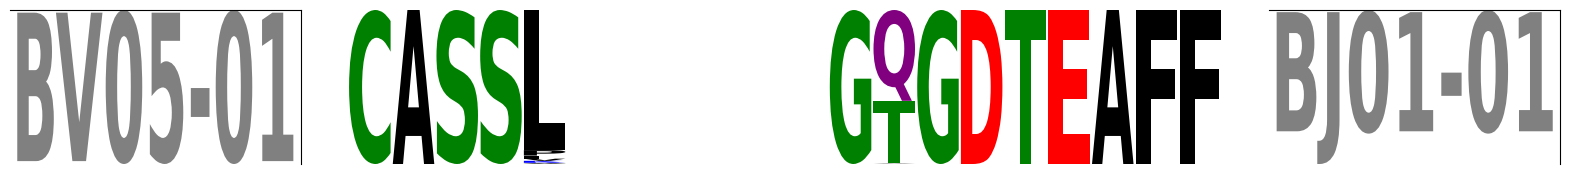

In [36]:
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(sample2, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

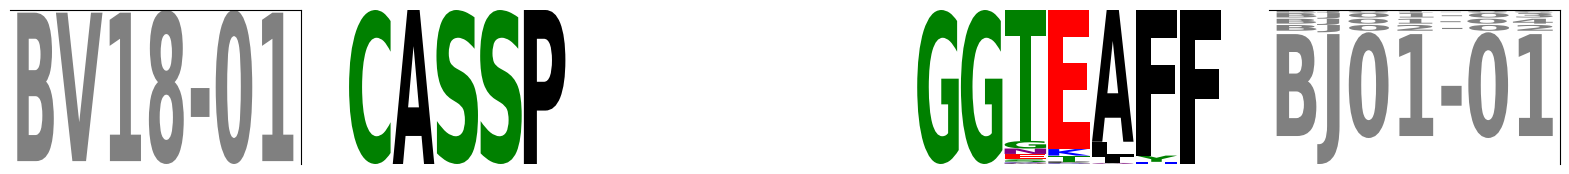

In [37]:
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),
                         gridspec_kw=dict(width_ratios=(1, 3, 1),
                                          wspace=0.1, hspace=0.5)
                         )
rsp.seqlogos_vj(sample3, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

In [38]:
# Processing of the labels of the 3 different metaclonotypes groups
groups_index = list(sample.index) + list(sample2.index) + list(sample3.index)
X_test = X_train.copy()
for i in range(len(X_test)):
    X_test[i] = X_test[i][groups_index]
print(X_test[0].shape)

(3503, 20)


In [39]:
# Assemble the dataframe with all the sequences from the 3 groups
df = pd.concat([sample, sample2, sample3])
df.reset_index(inplace=True, drop=True)
df.head(5)

,CDR3,CDR3_al,tokenized_smiles,TCR BioIdentity,TCR Nucleotide Sequence,Experiment,ORF Coverage,Amino Acids,Start Index in Genome,End Index in Genome,v_gene,j_gene,Amino Acids 1,CDR3_al_one_hot,CDR3_al_integer,label,file
0,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 15, 0, 0, 0, 0, 0, 0, 9, 17, 3,...",20,0
1,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD126,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 15, 0, 0, 0, 0, 0, 0, 9, 17, 3,...",20,0
2,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 15, 0, 0, 0, 0, 0, 0, 9, 17, 3,...",20,0
3,CASSRKTDSYEQYF,CASSR------KTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSRKTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD126,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 15, 0, 0, 0, 0, 0, 0, 9, 17, 3,...",20,0
4,CASSLRTDSYEQYF,CASSL------RTDSYEQYF,"[12, 16, 34, 34, 31, 31, 31, 31, 31, 31, 34, 2...",CASSLRTDSYEQYF+TCRBV28-01+TCRBJ02-07,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,eQD110,ORF1ab,"ALRKVPTDNYITTY,KVPTDNYITTY",4211,4252,TCRBV28-01,TCRBJ02-07,ALRKVPTDNYITTY,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2, 1, 16, 16, 10, 0, 0, 0, 0, 0, 0, 15, 17, 3...",20,0


In [40]:
# Save dataset
df.to_csv("metaclonotypes_tcrdist_3groups.csv", index=False)

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization_14 (BatchN  (None, 40)          160         ['dense_22[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                        

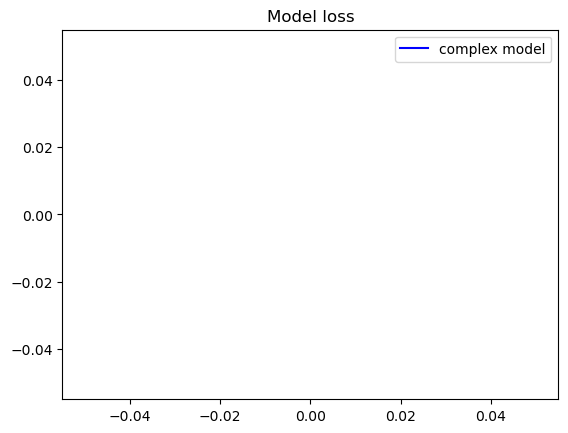

In [41]:
# Setting the parameters for model building and training of the deep AE
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.2,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 10,
            "patience": 20,
            "n_inputs" : 20,
            "v_inputs" : 54,
            "j_inputs" : 13
        }
model, encoder, decoder = train_model_complex(df, X_test, params=params)

In [44]:
# Get embeddings in the latent space and perform PCA
X_test_encode = encoder.predict(X_test)
# Umap embedding
import umap.umap_ as umap
reducer = umap.UMAP(random_state=42)
principalComponents = reducer.fit_transform(X_test_encode)
plot_X_test = principalComponents

110/110 [==============================] - 0s 658us/step


  0%|          | 0/3503 [00:00<?, ?it/s]

(3503, 20)


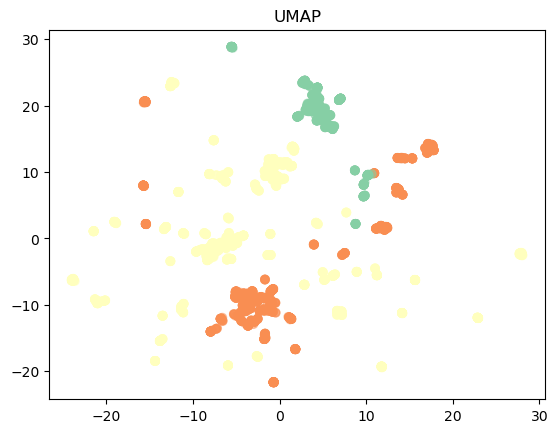

In [50]:
# Plot the latent space with data points coloured by their metaclonotype group
label = "file"
labels = []
labels_encoder = LabelEncoder()
labels_encoder = labels_encoder.fit(df[label].unique())
for k in tqdm(df.index):
    labels.append(labels_encoder.transform([df.loc[k,label]]))
labels = [int(y) for y in labels]
df[label] = labels
rgb_values = sns.color_palette("Spectral", df[label].nunique())
df[str(label+"_color")] = df[label].apply(lambda x: rgb_values[x])
print(X_test_encode.shape)
plt.scatter(plot_X_test[:,0], plot_X_test[:,1], color=df[str(label+"_color")], alpha=0.5)
plt.title("UMAP")
plt.show()

Accuracy:  0.9980017128175849


/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


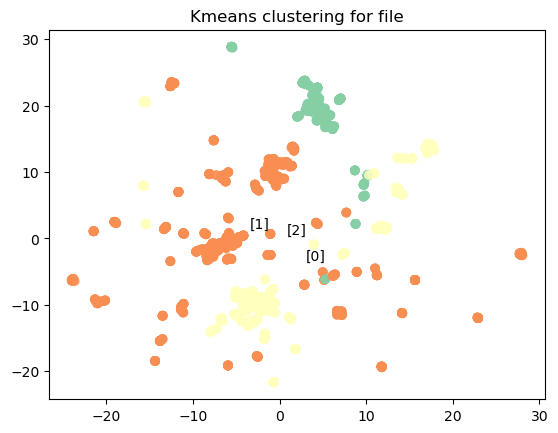

In [47]:
# Perform K-means on the latent space embeddings
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test_encode)
labels = pd.Series(kmeans.labels_)
rgb_values = sns.color_palette("Spectral", k)
col_kmeans = labels.apply(lambda x: rgb_values[x])
df[str(label+"_kmeans_label")] = kmeans.labels_
label_dict = {}
for cluster in range(k):
    label_ind = df[df[str(label+"_kmeans_label")] == cluster][label].value_counts().index[0]
    label_dict[cluster] = label_ind

print("Accuracy: ", sum([label_dict[x] == y for x,y in zip(df[str(label+"_kmeans_label")], df[label])])/len(df))
plt.scatter(plot_X_test[:,0], plot_X_test[:,1], color=col_kmeans, alpha=0.5)
centroids = kmeans.cluster_centers_
for cluster in range(k):
    plt.text(centroids[cluster,0], centroids[cluster,1], labels_encoder.inverse_transform([label_dict[cluster]]), fontsize=10)
plt.title("Kmeans clustering for "+label)
plt.show()

/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T
/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T
/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new 

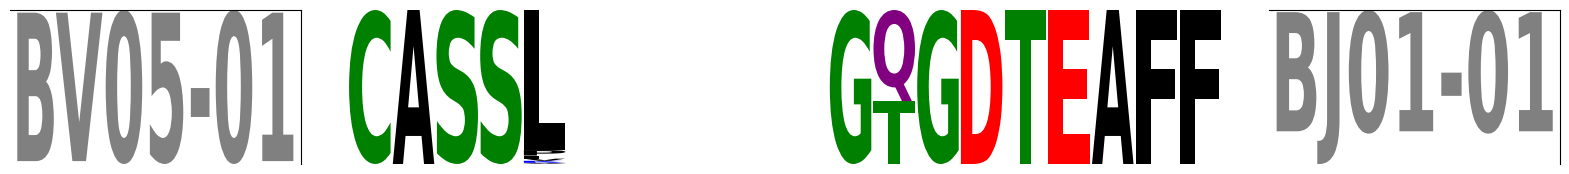

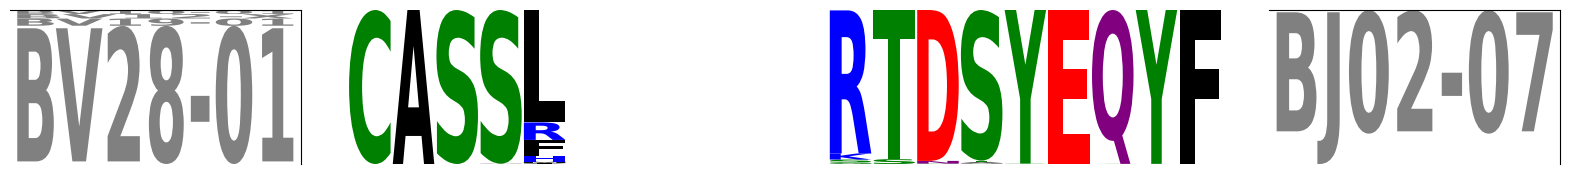

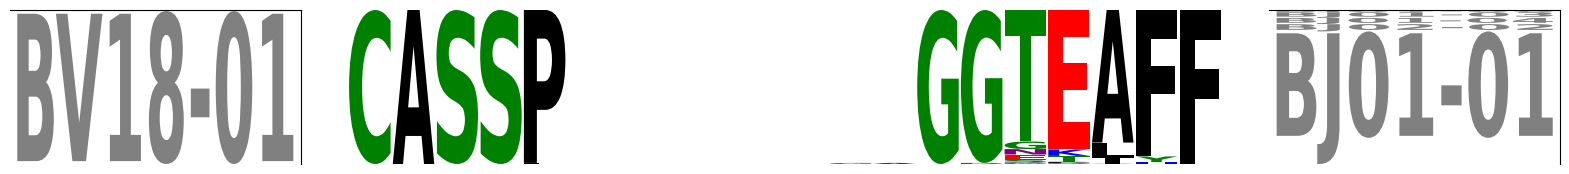

In [48]:
# Plot logos for each K-means group 
for cluster in range(k):
    fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(20, 2),gridspec_kw=dict(width_ratios=(1, 3, 1),wspace=0.1, hspace=0.5))
    cluster_df = df[df[str(label+"_kmeans_label")] == cluster]
    rsp.seqlogos_vj(cluster_df, "CDR3_al",'v_gene','j_gene',axes=axes[:3])

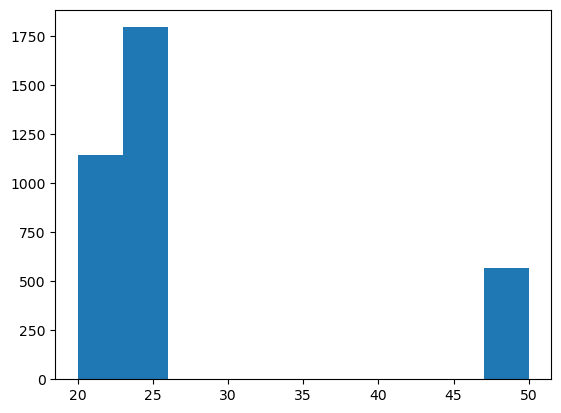

In [49]:
# Check distribution of the 3 metaclonotypes groups in our dataset
plt.hist(df["label"], bins=10)
plt.show()